In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

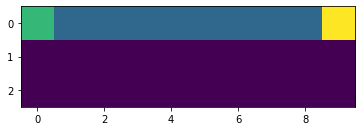

In [5]:

map_size = (3,10)
n_patches = 3

race_map = np.zeros((map_size[0], map_size[1]))


race_map[0,:] = 1

race_map[0,0] = 2
race_map[0,-1] = 3


plt.imshow(race_map)

In [6]:
def step(state, action):
        
    next_state =  state.copy()
        
    if action == 0:
        next_state[0] += 1
    elif action == 1:
        next_state[0] -= 1
    elif action == 2:
        next_state[1] += 1
    elif action == 3:
        next_state[1] -= 1
        
    next_state[0] = next_state[0] if next_state[0] >= 0 else 0
    next_state[0] = next_state[0] if next_state[0] < map_size[0] else map_size[0]-1
        
    next_state[1] = next_state[1] if next_state[1] >= 0 else 0
    next_state[1] = next_state[1] if next_state[1] < map_size[1] else map_size[1]-1
            
            
    reward = -1
    reward = 30 if next_state[0] == 0 and next_state[1] == race_map.shape[1]-1 else reward            
    reward = -100 if race_map[next_state[0],next_state[1]] == 1 else reward
    
    return (next_state,reward)

In [7]:
Q = np.random.rand(map_size[0],map_size[1],4) + 200
C = np.zeros((map_size[0],map_size[1],4))

policy_pi = np.argmax(Q,axis=-1)

In [9]:
time_to_end=[]

In [10]:
episodes = 5000
gamma = 1

for episode_idx in tqdm(range(episodes)):
    
    state = [0, 0]
    
    # Prepare soft policy
    rsh_pi = policy_pi.reshape((map_size[0]*map_size[1]))
    policy_b = np.zeros((rsh_pi.size, 4))
    policy_b[:,:] = .1/3
    policy_b[np.arange(rsh_pi.size),rsh_pi] = .9
    policy_b = policy_b.reshape(Q.shape)
    
    episode_len = 0
    while True:
        episode_len+=1
        
        action = np.random.choice(4,p=policy_b[state[0],state[1]])
        
        state_p, R = step(state, action)
        
        action_p = np.random.choice(4,p=policy_b[state_p[0],state_p[1]])
        C[state[0],state[1],action] += 1
        Q[state[0],state[1],action] += (R + gamma * np.max(Q[state_p[0],state_p[1]]) - Q[state[0],state[1],action])/C[state[0],state[1],action]
        
        policy_pi = np.argmax(Q,axis=-1)
        
        # Prepare soft policy
        policy_b[state[0],state[1],:] = .1/3
        policy_b[state[0],state[1],policy_pi[state[0],state[1]]] = .9
        
        action = action_p
        state = state_p
        
        if state[0] == 0 and state[1] == race_map.shape[1]-1:
            break
    time_to_end.append(episode_len)

100%|██████████| 5000/5000 [00:05<00:00, 876.64it/s]


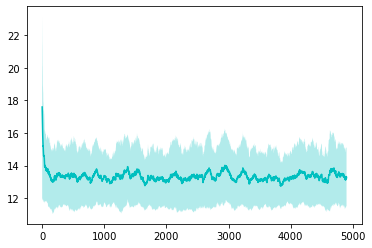

In [11]:
mean = []
ran = []
window_size = 100
te = time_to_end[-50000:]
for i in range(len(te)-window_size):
    mean.append(np.mean(te[i:i+window_size]))
    ran.append(np.mean(np.abs(te[i:i+window_size]-mean[-1])))

plt.fill_between(np.arange(len(mean)),np.array(mean)+np.array(ran), np.array(mean)-np.array(ran),alpha=0.3,facecolor="c")
plt.plot(mean,c="c")

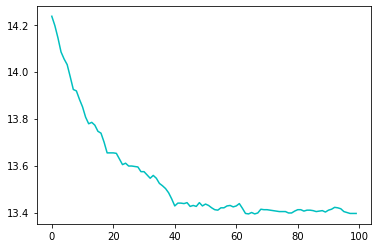

In [12]:
mean = []
ran = []
window_size = 500
for i in range(len(time_to_end)-window_size):
    mean.append(np.mean(time_to_end[i:i+window_size]))
    ran.append(np.mean(np.abs(time_to_end[i:i+window_size]-mean[-1])))

#plt.fill_between(np.arange(len(mean)),np.array(mean)+np.array(ran), np.array(mean)-np.array(ran),alpha=0.3,facecolor="c")
plt.plot(mean[0:100],c="c")

In [13]:
state = [0, 0]

# Prepare soft policy
rsh_pi = policy_pi.reshape((map_size[0]*map_size[1] ))
policy_b = np.zeros((rsh_pi.size, 4))
policy_b[:,:] = .1/3
policy_b[np.arange(rsh_pi.size),rsh_pi] = .9
policy_b = policy_b.reshape(Q.shape)
    
action = np.random.choice(4,p=policy_b[state[0],state[1]])
action = 0 if episode_idx==0 else action
    

states,actions,rewards = [state],[action],[]

episode_len = 0
while True:
    episode_len+=1
    state_p, R = step(state, action)
        
    action_p = np.random.choice(4,p=policy_b[state_p[0],state_p[1]])
    
    action = action_p
    state = state_p
    states.append(state)
    actions.append(action)
    rewards.append(R)
    
    if state[0] == 0 and state[1] == race_map.shape[1]-1:
        break

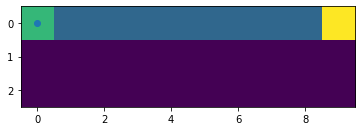

state:[0, 0]
actions:0
 rewards:-1


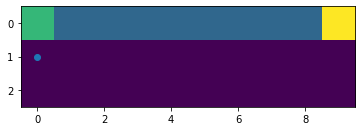

state:[1, 0]
actions:2
 rewards:-1


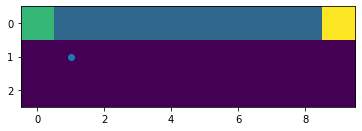

state:[1, 1]
actions:2
 rewards:-1


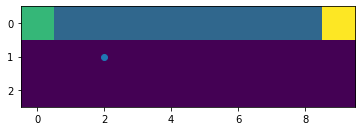

state:[1, 2]
actions:2
 rewards:-1


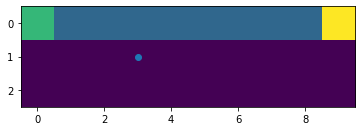

state:[1, 3]
actions:2
 rewards:-1


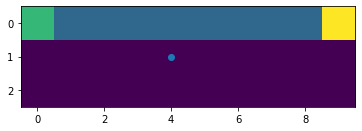

state:[1, 4]
actions:2
 rewards:-1


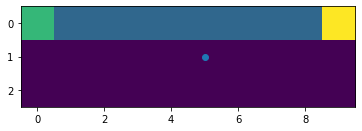

state:[1, 5]
actions:2
 rewards:-1


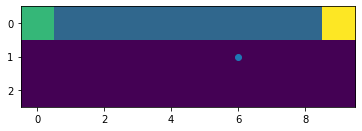

state:[1, 6]
actions:2
 rewards:-1


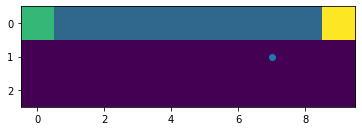

state:[1, 7]
actions:2
 rewards:-1


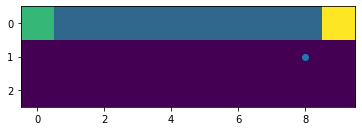

state:[1, 8]
actions:2
 rewards:-1


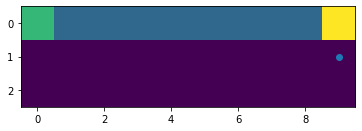

state:[1, 9]
actions:3
 rewards:-1


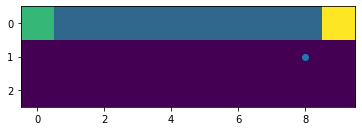

state:[1, 8]
actions:2
 rewards:-1


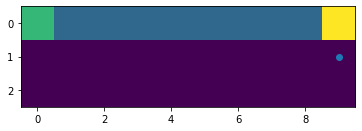

state:[1, 9]
actions:1
 rewards:30


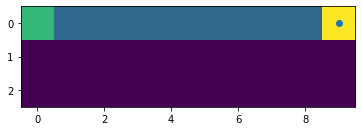

In [14]:
for i,j,k in zip(states,rewards,actions):
    plt.imshow(race_map)
    plt.scatter(i[1],i[0])
    plt.show()
    print(f"state:{i}")
    print(f"actions:{k}\n rewards:{j}")


plt.imshow(race_map)
plt.scatter(states[-1][1],states[-1][0])
plt.show()